### PROBLEM STATEMENT:
Analysis of Plant growth using different types of Organic manures and also using various parameters like treatment and land configurations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
dfbarn=pd.read_csv(r"C:\Users\lenovo\OneDrive\Pictures\Documents\barnyard Growth Analysis capstone Dataset.csv")

In [3]:
dfbarn.columns=['Plant_No', 'Treatment', 'Plant_Height_30DAS_cm',
       'Leaf_Length_30DAS_cm', 'Leaf_Breadth_30DAS_cm',
       'No_of _leaves_30DAS', 'Leaf_Area_30DAS_cm',
       'Leaf_Area _Index_30DAS_cm', 'Plant_Height_45DAS_m',
       'Leaf_Length_45DAS_cm', 'Leaf_Breadth_45DAS_cm',
       'No_of _Leaves_45DAS_cm', 'Leaf_Area_45DAS_cm',
       'Leaf _Area _Index_45DAS_cm', 'Land_Configuration', 'No_of_Panicles',
       'Panicle_length_cm', '100 _gram _seed  _weight', 'Weight_of_Panicle_gms',
       'Final_Plant_Height_cm', 'Organic_manure']

### EXPLORING THE FEATURES:

In [4]:

#Plant_No:Number of the plant
#Treatment:Different types of treatments with different land configurations,irrigation scheduling and organic manure
#Plant_Height_30DAS_cm:Height of the plant at 30 days in cm
#Leaf_Length_30DAS_cm:Length of the leaf at 30 days in cm
#Leaf_Breadth_30DAS_cm:Breadth of the leaf at 30 days in cm
#No_of _leaves_30DAS:Number of leaves per plant at 30 days 
#Leaf_Area:Leaf area at 30 Days which can be given by leaf length* leaf breadth*no of leaves
#Leaf_Area _Index_30DAS_cm:leaf area index at 30 days which can be given by leaf area/ground area
#Plant_Height_45DAS_m:Height of the plant at 45 days in m 
#Leaf_Length_45DAS_cm:Length of the leaf at 45 days in cm
#Leaf_Breadth_45DAS_cm:Breadth of the leaf at 45 days in cm
#No_of _Leaves_45DAS_cm:Number of leaves at 45 days
#Leaf_Area_45DAS_cm:Area of the leaf at 45 days in cm which can be given by leaf length* leaf breadth*no of leaves
#Leaf _Area _Index_45DAS_cm:leaf area index at 45 days in cm which can be given by leaf area/ground area
#Land_Configuration:Different types of land configurations
#No_of_Panicles:Number of panicles per plant 
#Panicle_length_cm:Length of the panicle in cm 
#100 _gram _seed  _weight:weight of 100 seeds in gms
#Weight_of_Panicle_gms: Weight of the panicle in gms
#Final_Plant_Height_cm: Final height of the plant at the harvest stage
#Organic_manure:Different types of organic manures

In [5]:
dfbarn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Plant_No                    1500 non-null   int64  
 1   Treatment                   1500 non-null   object 
 2   Plant_Height_30DAS_cm       1500 non-null   object 
 3   Leaf_Length_30DAS_cm        1500 non-null   float64
 4   Leaf_Breadth_30DAS_cm       1500 non-null   float64
 5   No_of _leaves_30DAS         1500 non-null   int64  
 6   Leaf_Area_30DAS_cm          1500 non-null   float64
 7   Leaf_Area _Index_30DAS_cm   1500 non-null   float64
 8   Plant_Height_45DAS_m        1500 non-null   object 
 9   Leaf_Length_45DAS_cm        1499 non-null   float64
 10  Leaf_Breadth_45DAS_cm       1499 non-null   float64
 11  No_of _Leaves_45DAS_cm      1497 non-null   float64
 12  Leaf_Area_45DAS_cm          1497 non-null   float64
 13  Leaf _Area _Index_45DAS_cm  1499 

In [6]:
dfbarn.describe()

,Plant_No,Leaf_Length_30DAS_cm,Leaf_Breadth_30DAS_cm,No_of _leaves_30DAS,Leaf_Area_30DAS_cm,Leaf_Area _Index_30DAS_cm,Leaf_Length_45DAS_cm,Leaf_Breadth_45DAS_cm,No_of _Leaves_45DAS_cm,Leaf_Area_45DAS_cm,Leaf _Area _Index_45DAS_cm,No_of_Panicles,Panicle_length_cm,100 _gram _seed _weight
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1499.000000,1499.000000,1497.000000,1497.000000,1499.000000,1500.000000,1500.000000,1500.000000
mean,750.500000,22.660540,1.892513,8.186000,377.108675,14.488011,28.258652,2.492308,10.020040,780.033245,23.353508,3.370667,19.120533,0.330560
std,433.157015,6.005141,0.536690,3.289572,254.115852,29.732749,6.447869,2.108980,4.948897,1355.817111,63.363416,1.526705,2.728938,0.093544
min,1.000000,6.700000,0.600000,3.000000,19.680000,0.082444,9.800000,1.000000,3.000000,79.560000,0.290889,1.000000,8.400000,0.014700
25%,375.750000,19.600000,1.600000,6.000000,206.400000,0.704978,22.600000,1.900000,7.000000,384.720000,1.476600,2.000000,17.600000,0.267000
50%,750.500000,21.800000,1.900000,7.000000,317.170000,6.468000,29.700000,2.300000,9.000000,589.960000,9.270000,3.000000,19.400000,0.331000
75%,1125.250000,26.200000,2.150000,10.000000,463.540000,14.904000,32.100000,2.600000,12.000000,849.420000,22.650000,4.000000,20.400000,0.420000
max,1500.000000,57.100000,11.000000,23.000000,1626.900000,287.500000,51.900000,22.200000,78.000000,20417.280000,800.420000,9.000000,26.800000,0.639000


In [7]:
dfbarn.dtypes

Plant_No                        int64
Treatment                      object
Plant_Height_30DAS_cm          object
Leaf_Length_30DAS_cm          float64
Leaf_Breadth_30DAS_cm         float64
No_of _leaves_30DAS             int64
Leaf_Area_30DAS_cm            float64
Leaf_Area _Index_30DAS_cm     float64
Plant_Height_45DAS_m           object
Leaf_Length_45DAS_cm          float64
Leaf_Breadth_45DAS_cm         float64
No_of _Leaves_45DAS_cm        float64
Leaf_Area_45DAS_cm            float64
Leaf _Area _Index_45DAS_cm    float64
Land_Configuration             object
No_of_Panicles                  int64
Panicle_length_cm             float64
100 _gram _seed  _weight      float64
Weight_of_Panicle_gms          object
Final_Plant_Height_cm          object
Organic_manure                 object
dtype: object

In [8]:
dfbarn.head()

,Plant_No,Treatment,Plant_Height_30DAS_cm,Leaf_Length_30DAS_cm,Leaf_Breadth_30DAS_cm,No_of _leaves_30DAS,Leaf_Area_30DAS_cm,Leaf_Area _Index_30DAS_cm,Plant_Height_45DAS_m,Leaf_Length_45DAS_cm,...,No_of _Leaves_45DAS_cm,Leaf_Area_45DAS_cm,Leaf _Area _Index_45DAS_cm,Land_Configuration,No_of_Panicles,Panicle_length_cm,100 _gram _seed _weight,Weight_of_Panicle_gms,Final_Plant_Height_cm,Organic_manure
0,1,R1L1I3N1,34.1cm,17.8,1.1,4,78.32,0.174044,0.395m,28.3,...,9.0,432.99,0.962200,Ridges and Furrows,2,18.6,0.34,12.3gms,91.2cm,Vermicompost
1,2,R1L1I3N1,45.7cm,31.2,2.9,5,452.40,1.005333,0.494m,26.6,...,9.0,406.98,0.904400,Ridges and Furrows,5,22.8,0.39,14gms,111.4cm,Vermicompost
2,3,R1L1I3N1,31.4cm,18.1,1.6,4,115.84,0.257422,0.418m,27.6,...,7.0,444.36,0.987467,Ridges and Furrows,6,20.3,0.31,11.5gms,108.8cm,Vermicompost
3,4,R1L1I3N1,30.3cm,22.2,2.1,7,326.34,0.725200,0.437m,27.9,...,11.0,675.18,1.500400,Ridges and Furrows,3,18.7,0.28,11.3gms,107.1cm,Vermicompost
4,5,R1L1I3N1,36.4cm,22.6,1.9,6,257.64,0.572533,0.441m,26.9,...,9.0,556.83,1.237400,Ridges and Furrows,6,16.8,0.19,3.5gms,90.3cm,Vermicompost


In [9]:
dfbarn.tail()

,Plant_No,Treatment,Plant_Height_30DAS_cm,Leaf_Length_30DAS_cm,Leaf_Breadth_30DAS_cm,No_of _leaves_30DAS,Leaf_Area_30DAS_cm,Leaf_Area _Index_30DAS_cm,Plant_Height_45DAS_m,Leaf_Length_45DAS_cm,...,No_of _Leaves_45DAS_cm,Leaf_Area_45DAS_cm,Leaf _Area _Index_45DAS_cm,Land_Configuration,No_of_Panicles,Panicle_length_cm,100 _gram _seed _weight,Weight_of_Panicle_gms,Final_Plant_Height_cm,Organic_manure
1495,1496,R1L2I2N5,34.6cm,19.8,1.75,9,311.9,102.91,0.364m,24.6,...,8.0,354.2,116.90,Raised bed,3,12.8,0.205,2.571gms,72.5cm,Sunhemp
1496,1497,R1L2I2N5,27.2cm,13.6,1.80,5,122.4,40.39,0.303m,23.9,...,30.0,1505.7,496.88,Raised bed,2,16.2,0.296,6.81gms,91.1cm,Sunhemp
1497,1498,R1L2I2N5,26.7cm,19.9,1.30,4,103.5,34.15,0.283m,22.5,...,6.0,202.5,66.83,Raised bed,2,15.3,0.274,6.118gms,86.1cm,Sunhemp
1498,1499,R1L2I2N5,39.9cm,16.6,1.30,9,194.2,64.09,0.278m,19.1,...,8.0,244.5,80.68,Raised bed,2,16.9,0.384,10.236gms,107.8cm,Sunhemp
1499,1500,R1L2I2N5,31.8cm,18.6,2.00,8,297.6,98.21,0.437m,21.9,...,9.0,354.8,117.08,Raised bed,2,17.1,0.410,9.679gms,108.1cm,Sunhemp


### DATA PRE-PROCESSING:

In [10]:
dfbarn.Plant_Height_30DAS_cm=dfbarn.Plant_Height_30DAS_cm.str.replace("cm","")

In [11]:
dfbarn.Final_Plant_Height_cm=dfbarn.Final_Plant_Height_cm.str.replace("cm","")

In [12]:
dfbarn.Plant_Height_45DAS_m=dfbarn.Plant_Height_45DAS_m.str.replace("m","")

In [13]:
dfbarn.Weight_of_Panicle_gms=dfbarn.Weight_of_Panicle_gms.str.replace("gms","")

In [14]:
dfbarn["Plant_Height_45DAS_m"]=dfbarn["Plant_Height_45DAS_m"].astype("float")

In [15]:
dfbarn.isna().sum()

Plant_No                      0
Treatment                     0
Plant_Height_30DAS_cm         0
Leaf_Length_30DAS_cm          0
Leaf_Breadth_30DAS_cm         0
No_of _leaves_30DAS           0
Leaf_Area_30DAS_cm            0
Leaf_Area _Index_30DAS_cm     0
Plant_Height_45DAS_m          0
Leaf_Length_45DAS_cm          1
Leaf_Breadth_45DAS_cm         1
No_of _Leaves_45DAS_cm        3
Leaf_Area_45DAS_cm            3
Leaf _Area _Index_45DAS_cm    1
Land_Configuration            0
No_of_Panicles                0
Panicle_length_cm             0
100 _gram _seed  _weight      0
Weight_of_Panicle_gms         0
Final_Plant_Height_cm         0
Organic_manure                0
dtype: int64

In [16]:
# FILLING NAN'S
for col in ["Leaf_Length_45DAS_cm","Leaf_Breadth_45DAS_cm","No_of _Leaves_45DAS_cm","Leaf_Area_45DAS_cm","Leaf _Area _Index_45DAS_cm"]:
    dfbarn[col]=dfbarn[col].fillna(dfbarn[col].mean())

In [17]:
corrections = {
    'Pungam cake': 'Pungam Cake'

}

In [18]:
dfbarn['Organic_manure'] = dfbarn['Organic_manure'].replace(corrections)

#### EXPLORATORY DATA ANALYSIS

<Axes: ylabel='Land_Configuration'>

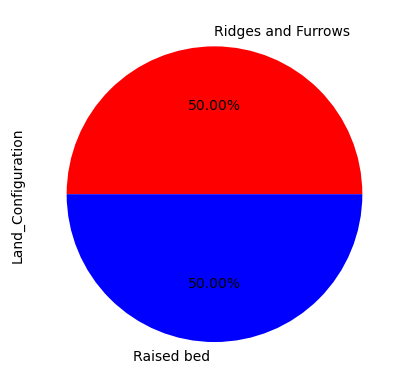

In [19]:
dfbarn.Land_Configuration.value_counts().plot(kind="pie",autopct="%.2f%%",colors=["red","blue"])

<Axes: ylabel='Organic_manure'>

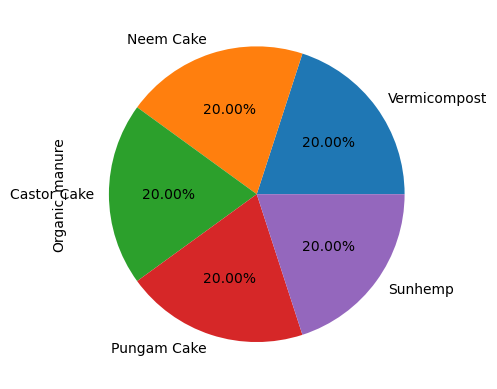

In [20]:
dfbarn.Organic_manure.value_counts().plot(kind="pie",autopct="%.2f%%")

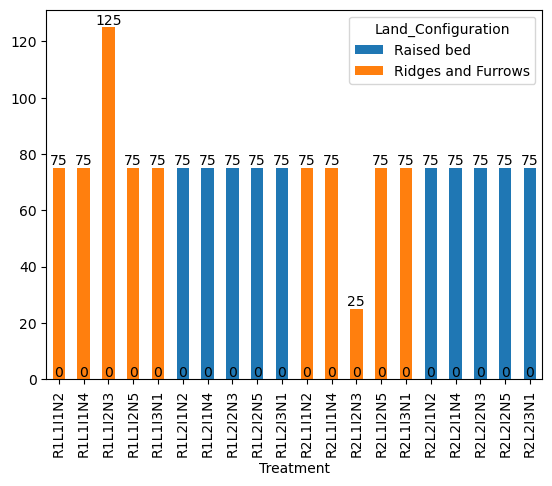

In [21]:
ax=pd.crosstab(dfbarn.Treatment,dfbarn.Land_Configuration).plot(kind="bar",stacked=True)
for i in ax.containers:
    ax.bar_label(i)

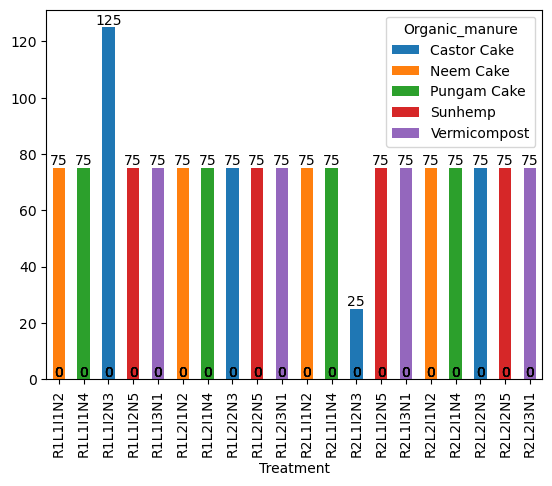

In [22]:
ax=pd.crosstab(dfbarn.Treatment,dfbarn.Organic_manure).plot(kind="bar",stacked=True)
for i in ax.containers:
    ax.bar_label(i)

In [23]:
numeric_data = dfbarn.select_dtypes(include='number')

In [24]:
correlation_matrix = numeric_data.corr()

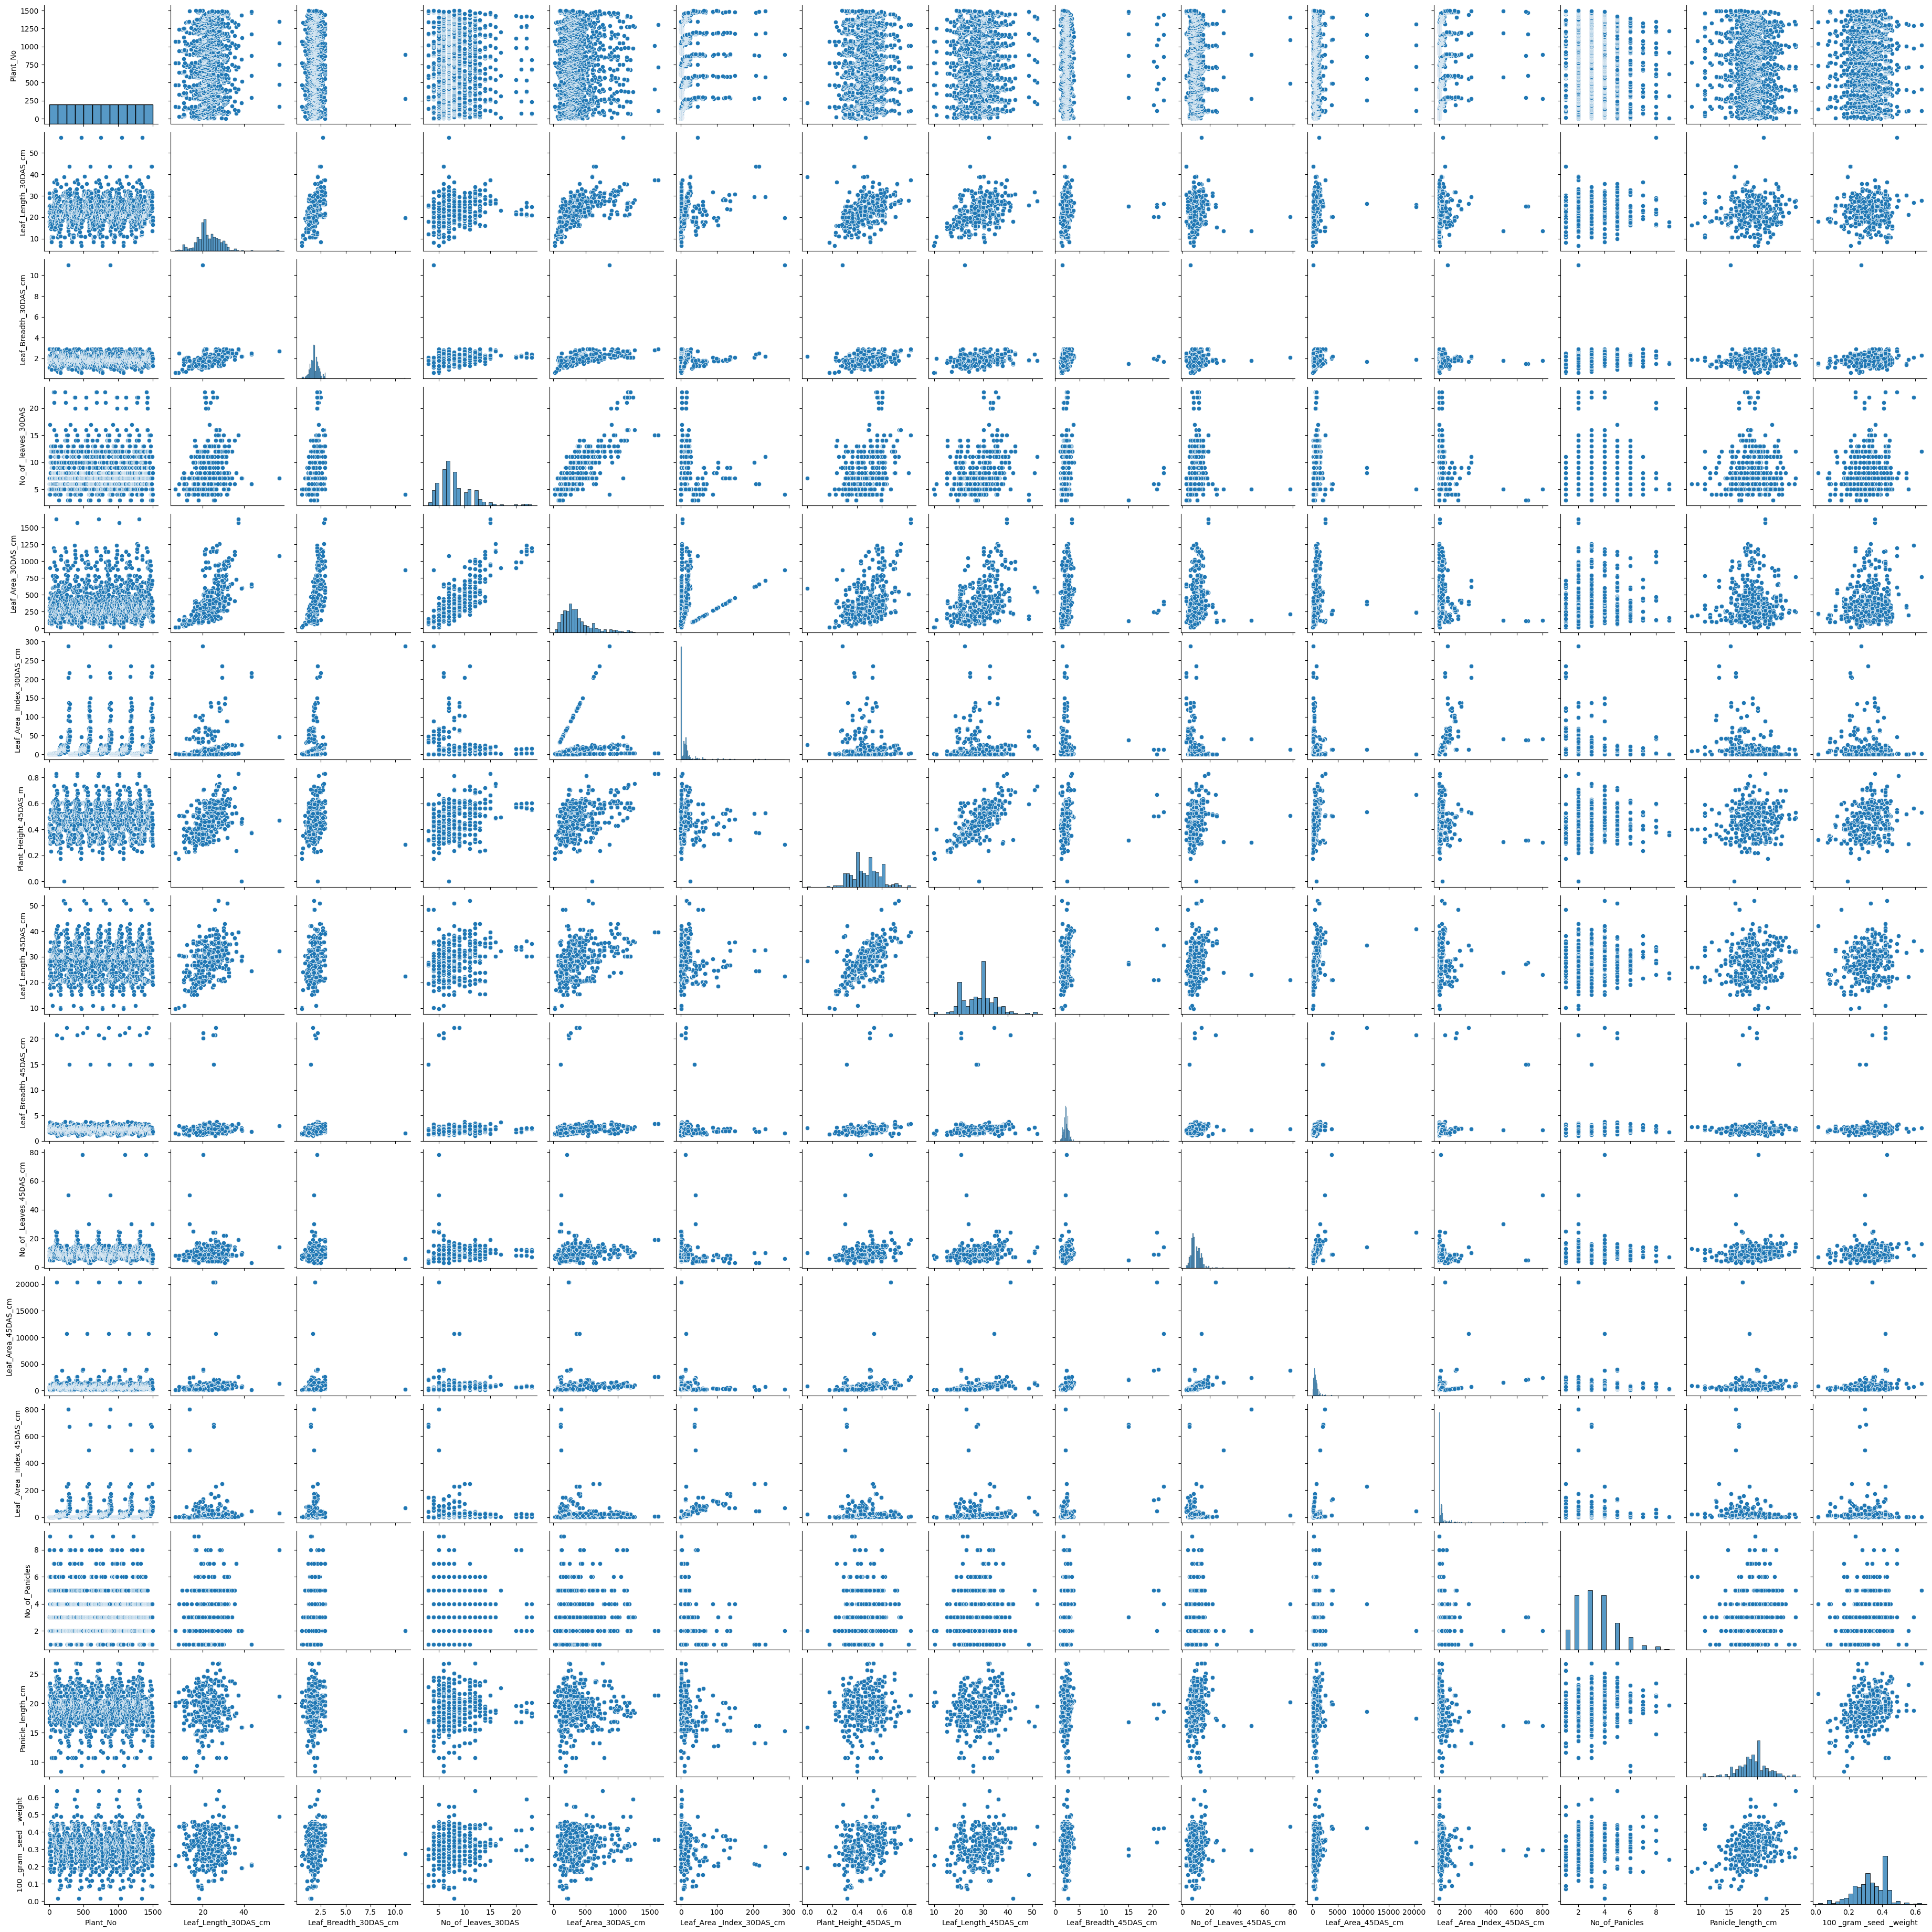

In [25]:
sns.pairplot(dfbarn)

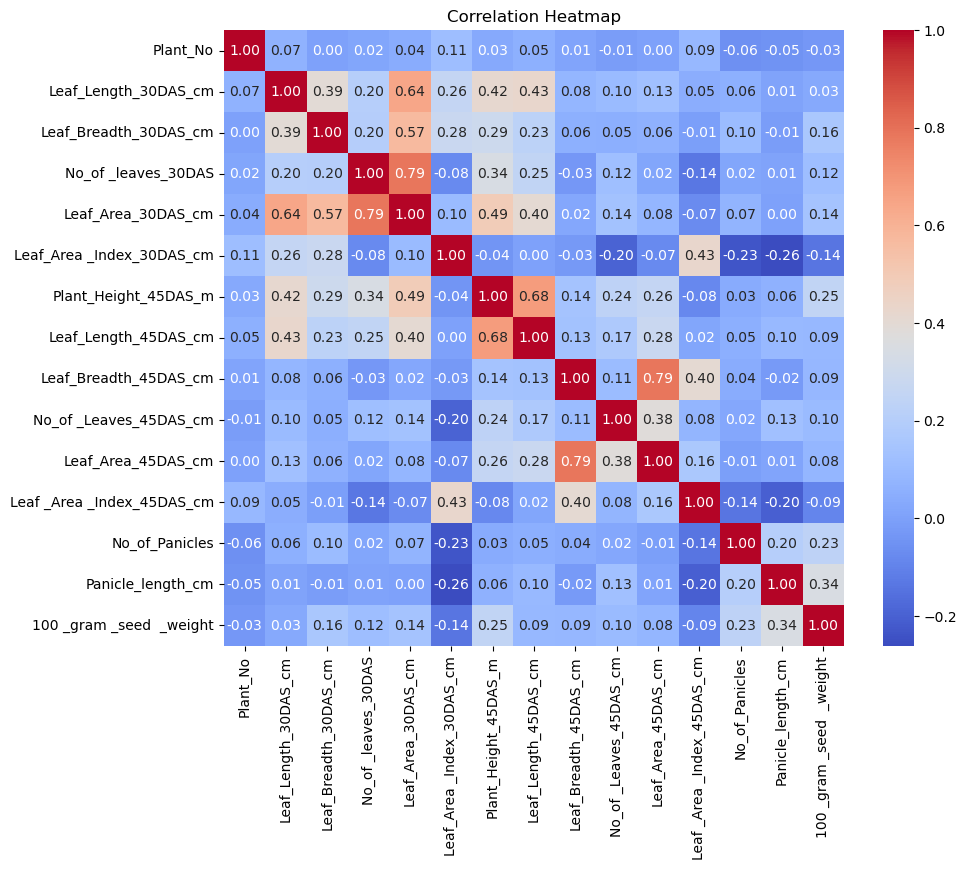

In [26]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [27]:
dfbarn["Plant_Height_45DAS_m"]=dfbarn["Plant_Height_45DAS_m"]*100  # Conversion of meters to centimeters

In [28]:
dfbarn=dfbarn.rename(columns={"Plant_Height_45DAS_m":"Plant_Height_45DAS_cm"})

In [29]:
dfbarn["Plant_Height_30DAS_cm"]=dfbarn["Plant_Height_30DAS_cm"].astype("float")

In [30]:
dfbarn["Weight_of_Panicle_gms"]=dfbarn["Weight_of_Panicle_gms"].astype("float")

In [31]:
dfbarn["Final_Plant_Height_cm"]=dfbarn["Final_Plant_Height_cm"].astype("float")

#### HYPOTHESIS TESTING

In [32]:
from scipy.stats import f_oneway

In [33]:
np.round(dfbarn.Weight_of_Panicle_gms .groupby(dfbarn.Organic_manure).mean(),2)

Organic_manure
Castor Cake     12.33
Neem Cake       16.03
Pungam Cake     12.08
Sunhemp          8.07
Vermicompost     8.97
Name: Weight_of_Panicle_gms, dtype: float64

In [34]:
Castor_Cake= dfbarn[dfbarn.Organic_manure=='Castor Cake']
Neem_Cake=dfbarn[dfbarn.Organic_manure=="Neem Cake"]
Pungam_Cake=dfbarn[dfbarn.Organic_manure=="Pungam Cake"]
Sunhemp=dfbarn[dfbarn.Organic_manure=="Sunhemp"]
Vermicompost=dfbarn[dfbarn.Organic_manure=="Vermicompost"]

In [35]:
f_oneway(Castor_Cake.Weight_of_Panicle_gms,Neem_Cake.Weight_of_Panicle_gms,Pungam_Cake.Weight_of_Panicle_gms,Sunhemp.Weight_of_Panicle_gms,Vermicompost.Weight_of_Panicle_gms)

F_onewayResult(statistic=210.20214256083253, pvalue=3.706219058961833e-143)

In [36]:
dfbarn["Organic_manure"].unique()

array(['Vermicompost', 'Neem Cake', 'Castor Cake', 'Pungam Cake',
       'Sunhemp'], dtype=object)

In [37]:
Vermicompost=dfbarn[dfbarn.Organic_manure=="Vermicompost"]
Neem_Cake=dfbarn[dfbarn.Organic_manure=="Neem Cake"]
Castor_Cake=dfbarn[dfbarn.Organic_manure=="Castor Cake"]
Pungam_cake=dfbarn[dfbarn.Organic_manure=="Pungam Cake"]
Sunhemp=dfbarn[dfbarn.Organic_manure=="Sunhemp"]

In [38]:
f_oneway(Vermicompost.Final_Plant_Height_cm,Neem_Cake.Final_Plant_Height_cm,Castor_Cake.Final_Plant_Height_cm,Pungam_cake.Final_Plant_Height_cm,Sunhemp.Final_Plant_Height_cm)

F_onewayResult(statistic=44.14293685606845, pvalue=4.5836396871088043e-35)

In [39]:
from scipy.stats import chi2_contingency

In [40]:
chi2_contingency(pd.crosstab(dfbarn.Treatment,dfbarn.Land_Configuration))

Chi2ContingencyResult(statistic=1500.0, pvalue=4.4206865470539e-307, dof=19, expected_freq=array([[37.5, 37.5],
       [37.5, 37.5],
       [62.5, 62.5],
       [37.5, 37.5],
       [37.5, 37.5],
       [37.5, 37.5],
       [37.5, 37.5],
       [37.5, 37.5],
       [37.5, 37.5],
       [37.5, 37.5],
       [37.5, 37.5],
       [37.5, 37.5],
       [12.5, 12.5],
       [37.5, 37.5],
       [37.5, 37.5],
       [37.5, 37.5],
       [37.5, 37.5],
       [37.5, 37.5],
       [37.5, 37.5],
       [37.5, 37.5]]))

#### ENCODING

In [41]:
from sklearn.preprocessing import OneHotEncoder

In [42]:
ohe=OneHotEncoder()

In [43]:
ohe.fit(dfbarn[["Treatment"]])

OneHotEncoder()

In [44]:
dfbarn["Treatment"]=ohe.transform(dfbarn[["Treatment"]]).toarray()

In [45]:
ohe1=OneHotEncoder()

In [46]:
ohe1.fit(dfbarn[["Land_Configuration"]])

OneHotEncoder()

In [47]:
dfbarn["Land_Configuration"]=ohe1.transform(dfbarn[["Land_Configuration"]]).toarray()

In [48]:
ohe2=OneHotEncoder()

In [49]:
ohe2.fit(dfbarn[["Organic_manure"]])

OneHotEncoder()

In [50]:
dfbarn["Organic_manure"]=ohe2.transform(dfbarn[["Organic_manure"]]).toarray()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Plant_No'),
  Text(1, 0, 'Treatment'),
  Text(2, 0, 'Plant_Height_30DAS_cm'),
  Text(3, 0, 'Leaf_Length_30DAS_cm'),
  Text(4, 0, 'Leaf_Breadth_30DAS_cm'),
  Text(5, 0, 'No_of _leaves_30DAS'),
  Text(6, 0, 'Leaf_Area_30DAS_cm'),
  Text(7, 0, 'Leaf_Area _Index_30DAS_cm'),
  Text(8, 0, 'Plant_Height_45DAS_cm'),
  Text(9, 0, 'Leaf_Length_45DAS_cm'),
  Text(10, 0, 'Leaf_Breadth_45DAS_cm'),
  Text(11, 0, 'No_of _Leaves_45DAS_cm'),
  Text(12, 0, 'Leaf_Area_45DAS_cm'),
  Text(13, 0, 'Leaf _Area _Index_45DAS_cm'),
  Text(14, 0, 'Land_Configuration'),
  Text(15, 0, 'No_of_Panicles'),
  Text(16, 0, 'Panicle_length_cm'),
  Text(17, 0, '100 _gram _seed  _weight'),
  Text(18, 0, 'Weight_of_Panicle_gms'),
  Text(19, 0, 'Final_Plant_Height_cm'),
  Text(20, 0, 'Organic_manure')])

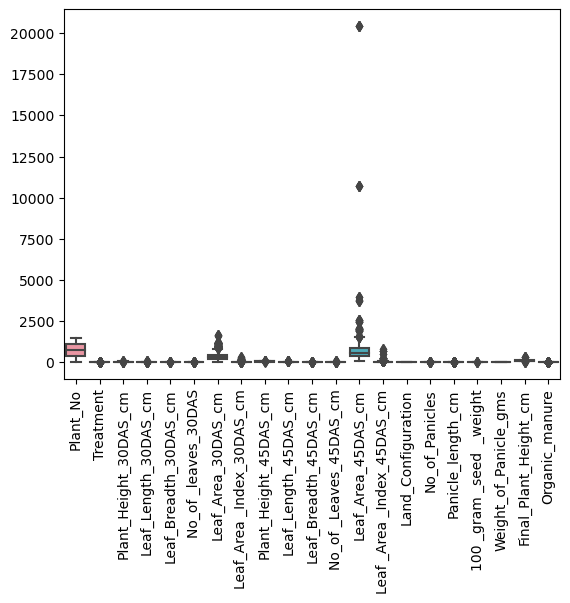

In [51]:
sns.boxplot(dfbarn)
plt.xticks(rotation=90)

#### SPLITTING OF VARIABLES INTO DEPENDENT AND INDEPENDENT COLUMNS

In [52]:
X=dfbarn.drop("Final_Plant_Height_cm",axis=1)

In [53]:
y=dfbarn["Final_Plant_Height_cm"]

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=2)

#### MODEL BUILDING

In [56]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

In [57]:
!pip install xgboost

In [58]:
from xgboost import XGBRegressor
xg_model= XGBRegressor().fit(X_train,y_train)
xg_score = xg_model.score(X_test,y_test)
xg_tr_pred= xg_model.predict(X_train)
xg_te_pred = xg_model.predict(X_test)
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
xg_tr_acc = round(r2_score(y_train,xg_tr_pred),4)
xg_te_acc = round(r2_score(y_test,xg_te_pred),4)
xg_tr_acc = round(r2_score(y_train,xg_tr_pred),4)
xg_te_acc = round(r2_score(y_test,xg_te_pred),4)
xg_tr_mse = round(mean_squared_error(y_train,xg_tr_pred),4)
xg_te_mse = round(mean_squared_error(y_test,xg_te_pred),4)
print("Training Accuracy : ",round(xg_tr_acc*100,2),"%")
print("*****************************************************")
print("Testing Accuracy : ",round(xg_te_acc*100,2),"%")
print("*******************************************************")
print("Score : ",xg_score)
print("*******************************************************")
print("Training r2_score : ",round(xg_tr_acc*100,2),"%")
print("*****************************************************")
print("Testing r2_score : ",round(xg_te_acc*100,2),"%")
print("*******************************************************")
print("Training MSE : ",xg_tr_mse)
print("********************************************************")
print("Testing MSE : ",xg_te_mse)
print("*****************************")

Training Accuracy :  100.0 %
*****************************************************
Testing Accuracy :  98.84 %
*******************************************************
Score :  0.9883643586257289
*******************************************************
Training r2_score :  100.0 %
*****************************************************
Testing r2_score :  98.84 %
*******************************************************
Training MSE :  0.0092
********************************************************
Testing MSE :  1.9579
*****************************


In [59]:
from sklearn.ensemble import RandomForestRegressor
rfr_model= RandomForestRegressor().fit(X_train,y_train)
rfr_score = rfr_model.score(X_test,y_test)
rfr_tr_pred= rfr_model.predict(X_train)
rfr_te_pred = rfr_model.predict(X_test)
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
rfr_tr_acc = round(r2_score(y_train,rfr_tr_pred),4)
rfr_te_acc = round(r2_score(y_test,rfr_te_pred),4)
rfr_tr_mse = round(mean_squared_error(y_train,rfr_tr_pred),4)
rfr_te_mse = round(mean_squared_error(y_test,rfr_te_pred),4)
print("Training Accuracy : ",round(rfr_tr_acc*100,2),"%")
print("*****************************************************")
print("Testing Accuracy : ",round(rfr_te_acc*100,2),"%")
print("*******************************************************")
print("Score : ",rfr_score)
print("*****************************************************")
print("Training r2_score : ",round(rfr_tr_acc*100,2),"%")
print("*****************************************************")
print("Testing r2_score : ",round(rfr_te_acc*100,2),"%")
print("*******************************************************")
print("Training MSE : ",rfr_tr_mse)
print("********************************************************")
print("Testing MSE : ",rfr_te_mse)
print("*****************************")

Training Accuracy :  99.73 %
*****************************************************
Testing Accuracy :  97.44 %
*******************************************************
Score :  0.9743673109980231
*****************************************************
Training r2_score :  99.73 %
*****************************************************
Testing r2_score :  97.44 %
*******************************************************
Training MSE :  0.9191
********************************************************
Testing MSE :  4.3132
*****************************


In [60]:
from sklearn.tree import DecisionTreeRegressor
dtr_model= DecisionTreeRegressor().fit(X_train,y_train)
dtr_score = dtr_model.score(X_test,y_test)
dtr_tr_pred= dtr_model.predict(X_train)
dtr_te_pred = dtr_model.predict(X_test)
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
dtr_tr_acc = round(r2_score(y_train,dtr_tr_pred),4)
dtr_te_acc = round(r2_score(y_test,dtr_te_pred),4)
dtr_tr_mse = round(mean_squared_error(y_train,dtr_tr_pred),4)
dtr_te_mse = round(mean_squared_error(y_test,dtr_te_pred),4)
print("Training Accuracy : ",round(dtr_tr_acc*100,2),"%")
print("*****************************************************")
print("Testing Accuracy : ",round(dtr_te_acc*100,2),"%")
print("*******************************************************")
print("Score : ",dtr_score)
print("****************************************************")
print("Training r2_score : ",round(dtr_tr_acc*100,2),"%")
print("*****************************************************")
print("Testing r2_score : ",round(dtr_te_acc*100,2),"%")
print("*******************************************************")
print("Training MSE : ",dtr_tr_mse)
print("********************************************************")
print("Testing MSE : ",dtr_te_mse)
print("*****************************")

Training Accuracy :  100.0 %
*****************************************************
Testing Accuracy :  95.96 %
*******************************************************
Score :  0.9595813389344432
****************************************************
Training r2_score :  100.0 %
*****************************************************
Testing r2_score :  95.96 %
*******************************************************
Training MSE :  0.0
********************************************************
Testing MSE :  6.8012
*****************************


In [61]:
from sklearn.linear_model import Lasso
lasso_model= Lasso().fit(X_train,y_train)
lasso_score = lasso_model.score(X_test,y_test)
lasso_tr_pred= lasso_model.predict(X_train)
lasso_te_pred = lasso_model.predict(X_test)
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
lasso_tr_acc = round(r2_score(y_train,lasso_tr_pred),4)
lasso_te_acc = round(r2_score(y_test,lasso_te_pred),4)
lasso_tr_mse = round(mean_squared_error(y_train,lasso_tr_pred),4)
lasso_te_mse = round(mean_squared_error(y_test,lasso_te_pred),4)
print("Training Accuracy : ",round(lasso_tr_acc*100,2),"%")
print("*****************************************************")
print("Testing Accuracy : ",round(lasso_te_acc*100,2),"%")
print("*******************************************************")
print("Score : ",lasso_score)
print("*******************************************************")
print("Training r2_score : ",round(lasso_tr_acc*100,2),"%")
print("*****************************************************")
print("Testing r2_score : ",round(lasso_te_acc*100,2),"%")
print("*******************************************************")
print("Training MSE : ",lasso_tr_mse)
print("********************************************************")
print("Testing MSE : ",lasso_te_mse)
print("*****************************")

Training Accuracy :  14.34 %
*****************************************************
Testing Accuracy :  24.52 %
*******************************************************
Score :  0.24524338033867576
*******************************************************
Training r2_score :  14.34 %
*****************************************************
Testing r2_score :  24.52 %
*******************************************************
Training MSE :  290.1054
********************************************************
Testing MSE :  127.0017
*****************************


In [62]:
from sklearn.linear_model import Ridge
ridge_model= Ridge().fit(X_train,y_train)
ridge_score = ridge_model.score(X_test,y_test)
ridge_tr_pred= ridge_model.predict(X_train)
ridge_te_pred = ridge_model.predict(X_test)
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
ridge_tr_acc = round(r2_score(y_train,ridge_tr_pred),4)
ridge_te_acc = round(r2_score(y_test,ridge_te_pred),4)
ridge_tr_mse = round(mean_squared_error(y_train,ridge_tr_pred),4)
ridge_te_mse = round(mean_squared_error(y_test,ridge_te_pred),4)
print("Training Accuracy : ",round(ridge_tr_acc*100,2),"%")
print("*****************************************************")
print("Testing Accuracy : ",round(ridge_te_acc*100,2),"%")
print("*******************************************************")
print("Score : ",ridge_score)
print("******************************************************")
print("Training r2_score : ",round(ridge_tr_acc*100,2),"%")
print("*****************************************************")
print("Testing r2_score : ",round(ridge_te_acc*100,2),"%")
print("*******************************************************")
print("Training MSE : ",ridge_tr_mse)
print("********************************************************")
print("Testing MSE : ",ridge_te_mse)
print("*****************************")

Training Accuracy :  18.83 %
*****************************************************
Testing Accuracy :  34.68 %
*******************************************************
Score :  0.34675066687927325
******************************************************
Training r2_score :  18.83 %
*****************************************************
Testing r2_score :  34.68 %
*******************************************************
Training MSE :  274.8778
********************************************************
Testing MSE :  109.9212
*****************************


In [63]:
from sklearn.ensemble import GradientBoostingRegressor
gbr_model= GradientBoostingRegressor().fit(X_train,y_train)
gbr_score = gbr_model.score(X_test,y_test)
gbr_tr_pred= gbr_model.predict(X_train)
gbr_te_pred = gbr_model.predict(X_test)
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
gbr_tr_acc = round(r2_score(y_train,gbr_tr_pred),4)
gbr_te_acc = round(r2_score(y_test,gbr_te_pred),4)
gbr_tr_mse = round(mean_squared_error(y_train,gbr_tr_pred),4)
gbr_te_mse = round(mean_squared_error(y_test,gbr_te_pred),4)
print("Training Accuracy : ",round(gbr_tr_acc*100,2),"%")
print("*****************************************************")
print("Testing Accuracy : ",round(gbr_te_acc*100,2),"%")
print("*******************************************************")
print("Score : ",gbr_score)
print("******************************************************")
print("Training r2_score : ",round(gbr_tr_acc*100,2),"%")
print("*****************************************************")
print("Testing r2_score : ",round(gbr_te_acc*100,2),"%")
print("*******************************************************")
print("Training MSE : ",gbr_tr_mse)
print("********************************************************")
print("Testing MSE : ",gbr_te_mse)
print("********************")

Training Accuracy :  92.99 %
*****************************************************
Testing Accuracy :  83.82 %
*******************************************************
Score :  0.8381690948085145
******************************************************
Training r2_score :  92.99 %
*****************************************************
Testing r2_score :  83.82 %
*******************************************************
Training MSE :  23.7418
********************************************************
Testing MSE :  27.231
********************


In [64]:
from sklearn.ensemble import AdaBoostRegressor
adb_model= AdaBoostRegressor().fit(X_train,y_train)
adb_score = adb_model.score(X_test,y_test)
adb_tr_pred= adb_model.predict(X_train)
adb_te_pred = adb_model.predict(X_test)
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
adb_tr_acc = round(r2_score(y_train,adb_tr_pred),4)
adb_te_acc = round(r2_score(y_test,adb_te_pred),4)
adb_tr_mse = round(mean_squared_error(y_train,adb_tr_pred),4)
adb_te_mse = round(mean_squared_error(y_test,adb_te_pred),4)
print("Training Accuracy : ",round(adb_tr_acc*100,2),"%")
print("*****************************************************")
print("Testing Accuracy : ",round(adb_te_acc*100,2),"%")
print("*******************************************************")
print("Score : ",adb_score)
print("*****************************************************")
print("Training r2_score : ",round(adb_tr_acc*100,2),"%")
print("*****************************************************")
print("Testing r2_score : ",round(adb_te_acc*100,2),"%")
print("*******************************************************")
print("Training MSE : ",adb_tr_mse)
print("********************************************************")
print("Testing MSE : ",adb_te_mse)
print("********************")

Training Accuracy :  75.57 %
*****************************************************
Testing Accuracy :  51.77 %
*******************************************************
Score :  0.5176678870148332
*****************************************************
Training r2_score :  75.57 %
*****************************************************
Testing r2_score :  51.77 %
*******************************************************
Training MSE :  82.7334
********************************************************
Testing MSE :  81.1613
********************


In [65]:
from sklearn.linear_model import LinearRegression
lr_model= LinearRegression().fit(X_train,y_train)
lr_score = lr_model.score(X_test,y_test)
lr_tr_pred= lr_model.predict(X_train)
lr_te_pred = lr_model.predict(X_test)
from sklearn.metrics import accuracy_score,mean_absolute_error,r2_score,mean_squared_error
lr_tr_acc = round(r2_score(y_train,lr_tr_pred),4)
lr_te_acc = round(r2_score(y_test,lr_te_pred),4)
lr_tr_mse = round(mean_squared_error(y_train,lr_tr_pred),4)
lr_te_mse = round(mean_squared_error(y_test,lr_te_pred),4)
print("Training Accuracy : ",round(lr_tr_acc*100,2),"%")
print("*****************************************************")
print("Testing Accuracy : ",round(lr_te_acc*100,2),"%")
print("*******************************************************")
print("Score : ",lr_score)
print("*****************************************************")
print("Training r2_score : ",round(lr_tr_acc*100,2),"%")
print("*****************************************************")
print("Testing r2_score : ",round(lr_te_acc*100,2),"%")
print("*******************************************************")
print("Training MSE : ",lr_tr_mse)
print("********************************************************")
print("Testing MSE : ",lr_te_mse)
print("********************")


Training Accuracy :  18.87 %
*****************************************************
Testing Accuracy :  34.62 %
*******************************************************
Score :  0.34620116913873433
*****************************************************
Training r2_score :  18.87 %
*****************************************************
Testing r2_score :  34.62 %
*******************************************************
Training MSE :  274.7612
********************************************************
Testing MSE :  110.0137
********************


<Axes: >

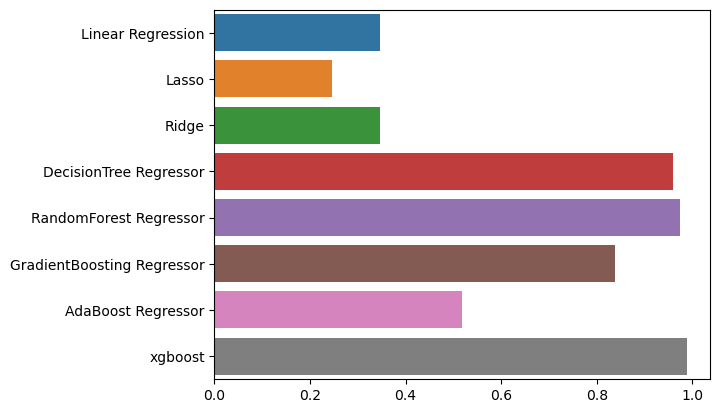

In [66]:
Models = ["Linear Regression","Lasso","Ridge","DecisionTree Regressor","RandomForest Regressor","GradientBoosting Regressor",
          "AdaBoost Regressor","xgboost"]
Accuracy = [lr_te_acc,lasso_te_acc,ridge_te_acc,dtr_te_acc,rfr_te_acc,gbr_te_acc,adb_te_acc,xg_te_acc]
sns.barplot(x=Accuracy,y=Models)

In [67]:
rfr=RandomForestRegressor()
dtr=DecisionTreeRegressor()
lss=Lasso()
rid=Ridge()
lr=LinearRegression()
gbr=GradientBoostingRegressor()
abr=AdaBoostRegressor()
xg=XGBRegressor()


In [68]:
model=[rfr,dtr,lss,rid,lr,gbr,abr,xg]

In [69]:
for i in model:
    print(i)
    i.fit(X_train,y_train)
    s=i.score(X_test,y_test)
    print(s)


RandomForestRegressor()
0.9660821730460368
DecisionTreeRegressor()
0.9590823345591059
Lasso()
0.24524338033867576
Ridge()
0.34675066687927325
LinearRegression()
0.34620116913873433
GradientBoostingRegressor()
0.8382032157862217
AdaBoostRegressor()
0.5404791671426343
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_sta

#### CROSS VALIDATION

In [70]:
from sklearn.model_selection import KFold,cross_val_score,StratifiedKFold

In [71]:
xg_boost=XGBRegressor()

In [72]:
kf=KFold()

In [73]:
score=cross_val_score(xg_boost,X,y,cv=kf)

In [74]:
score.mean()

0.9950845133116506

#### CONCLUSION:
From the above algorithms XGboost gave the best accuracy.
XGboost will be a best model for this data.